In [12]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

# Set up and Inspect the Data

In [13]:
df = pd.read_csv(os.path.expanduser("notebook_data/predictions/RF+OD/RF_OD_YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200625204022.csv"))

# Drop extra index column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Add integer column for OD predictions
df['OD_prediction'] = np.invert(df['dead']).astype(int)

# Filter out controls
if 'standard_type' in df.columns:
    df = df[pd.isna(df['standard_type'])]

if 'control_type' in df.columns:
    df = df[df['control_type'] != 'EMPTY_VECTOR']

In [14]:
df

,experiment_id,well_id,strain,lab,strain_name,media_type,inducer_type,inducer_concentration,inducer_concentration_unit,temperature,temperature_unit,od,dead,ungrowing,doubling_time,n0,RF_prediction_mean,RF_prediction_std,OD_prediction
0,r1e88vn4eg69sq,a1,UWBF_6390,transcriptic,CRISPR_w303_positive_control_NOR_00_6390,Synthetic_Complete,doxycycline-hyclate,0.0,nM,35.0,celsius,0.037637,False,False,1.182585,0.012882,0.961491,0.018825,1
1,r1e88vn4eg69sq,a2,UWBF_24864,transcriptic,CRISPR_CEN.PK2_positive_control_NOR_00_24864,Synthetic_Complete,doxycycline-hyclate,0.0,nM,35.0,celsius,0.038644,False,False,4.386800,0.158272,0.984093,0.012097,1
2,r1e88vn4eg69sq,b1,UWBF_6390,transcriptic,CRISPR_w303_positive_control_NOR_00_6390,Synthetic_Complete,doxycycline-hyclate,0.0,nM,35.0,celsius,0.037957,False,False,1.372387,0.018083,0.964460,0.020040,1
3,r1e88vn4eg69sq,b2,UWBF_24864,transcriptic,CRISPR_CEN.PK2_positive_control_NOR_00_24864,Synthetic_Complete,doxycycline-hyclate,0.0,nM,35.0,celsius,0.040570,False,False,1.389115,0.018790,0.984064,0.011560,1
4,r1e88vn4eg69sq,b3,UWBF_34314,transcriptic,CRISPR_CEN.PK2_34314,Synthetic_Complete,doxycycline-hyclate,0.0,nM,35.0,celsius,0.038639,False,False,1.360479,0.026156,0.987097,0.007861,1
5,r1e88vn4eg69sq,b4,UWBF_34314,transcriptic,CRISPR_CEN.PK2_34314,Synthetic_Complete,doxycycline-hyclate,10.0,nM,35.0,celsius,0.039672,False,False,1.196399,0.017481,0.987555,0.007420,1
6,r1e88vn4eg69sq,b5,UWBF_34314,transcriptic,CRISPR_CEN.PK2_34314,Synthetic_Complete,doxycycline-hyclate,30.0,nM,35.0,celsius,0.040491,False,False,1.282766,0.024654,0.987270,0.008639,1
7,r1e88vn4eg69sq,b6,UWBF_34314,transcriptic,CRISPR_CEN.PK2_34314,Synthetic_Complete,doxycycline-hyclate,20.0,nM,35.0,celsius,0.040590,False,False,1.260411,0.018139,0.987080,0.006944,1
8,r1e88vn4eg69sq,b7,UWBF_34314,transcriptic,CRISPR_CEN.PK2_34314,Synthetic_Complete,doxycycline-hyclate,40.0,nM,35.0,celsius,0.040206,False,False,1.183555,0.017635,0.987523,0.006276,1
9,r1e88vn4eg69sq,c1,UWBF_6390,transcriptic,CRISPR_w303_positive_control_NOR_00_6390,Synthetic_Complete,doxycycline-hyclate,0.0,nM,35.0,celsius,0.038825,False,False,1.392308,0.026074,0.954338,0.030480,1


In [15]:
df.experiment_id.unique()

array(['r1e88vn4eg69sq', 'r1e88vpdr9u4jk'], dtype=object)

In [16]:
df.describe()

,inducer_concentration,temperature,od,doubling_time,n0,RF_prediction_mean,RF_prediction_std,OD_prediction
count,58.000000,58.0,58.000000,48.000000,48.000000,58.000000,58.000000,58.000000
mean,13.793103,35.0,0.056559,1.793490,0.076859,0.898870,0.064682,0.827586
std,15.081950,0.0,0.056479,0.872300,0.081552,0.186500,0.112486,0.381039
min,0.000000,35.0,0.034490,0.695815,0.001314,0.278235,0.006059,0.000000
25%,0.000000,35.0,0.038035,1.193188,0.017596,0.956126,0.008280,1.000000
50%,10.000000,35.0,0.039676,1.540528,0.037472,0.981923,0.011613,1.000000
75%,30.000000,35.0,0.047606,2.260617,0.143364,0.985485,0.027870,1.000000
max,40.000000,35.0,0.333972,4.386800,0.297670,0.987732,0.476328,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b293a04f1d0>]],
      dtype=object)

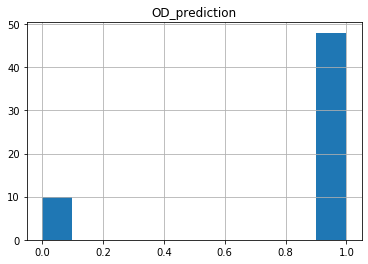

In [17]:
pd.DataFrame.hist(df, column='OD_prediction')

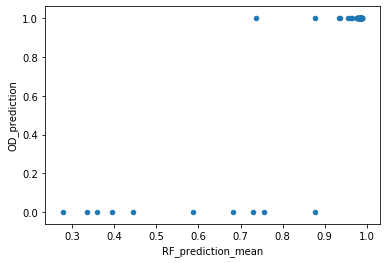

In [18]:
df.plot.scatter(x='RF_prediction_mean', y='OD_prediction')

In [19]:
num_preds = df.shape[0]
od_loss = sum(abs(df['OD_prediction']-df['RF_prediction_mean']))/num_preds
od_accuracy = sum(np.round(df['RF_prediction_mean']).astype(int) == df['OD_prediction'])/num_preds
print("OD Loss: " + str(od_loss))
print("OD Accuracy: " + str(od_accuracy))

OD Loss: 0.1164501431095707
OD Accuracy: 0.9137931034482759


# Using Statsmodels


In [20]:
smx = sm.add_constant(df['RF_prediction_mean'])
reg_log = sm.Logit(df['OD_prediction'], smx)

In [21]:
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.086071
         Iterations 9


In [22]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          OD_prediction   No. Observations:                   58
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.8128
Time:                        13:37:40   Log-Likelihood:                -4.9921
converged:                       True   LL-Null:                       -26.662
Covariance Type:            nonrobust   LLR p-value:                 4.600e-11
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -19.9831      7.005     -2.853      0.004     -33.712      -6.254
RF_prediction_mean    25.1440      8.178      3.075      0.002       9.115      41.173
======================================================================================
"""

In [23]:
support = np.linspace(0, 1, 100)
smxnew = sm.add_constant(support)
results_log.predict(smxnew)

array([2.09627373e-09, 2.70240319e-09, 3.48379264e-09, 4.49111784e-09,
       5.78970723e-09, 7.46377872e-09, 9.62190152e-09, 1.24040372e-08,
       1.59906166e-08, 2.06142416e-08, 2.65747699e-08, 3.42587619e-08,
       4.41645503e-08, 5.69345588e-08, 7.33969657e-08, 9.46194131e-08,
       1.21978248e-07, 1.57247782e-07, 2.02715363e-07, 2.61329712e-07,
       3.36892165e-07, 4.34303193e-07, 5.59880215e-07, 7.21767302e-07,
       9.30463339e-07, 1.19950290e-06, 1.54633400e-06, 1.99344962e-06,
       2.56984640e-06, 3.31290512e-06, 4.27081476e-06, 5.50569757e-06,
       7.09763748e-06, 9.14987320e-06, 1.17954925e-05, 1.52060618e-05,
       1.96027497e-05, 2.52706660e-05, 3.25773435e-05, 4.19965611e-05,
       5.41390473e-05, 6.97920514e-05, 8.99703382e-05, 1.15981897e-04,
       1.49512601e-04, 1.92735261e-04, 2.48450072e-04, 3.20265445e-04,
       4.12830733e-04, 5.32135626e-04, 6.85895055e-04, 8.84043636e-04,
       1.13937020e-03, 1.46833096e-03, 1.89208989e-03, 2.43784666e-03,
      

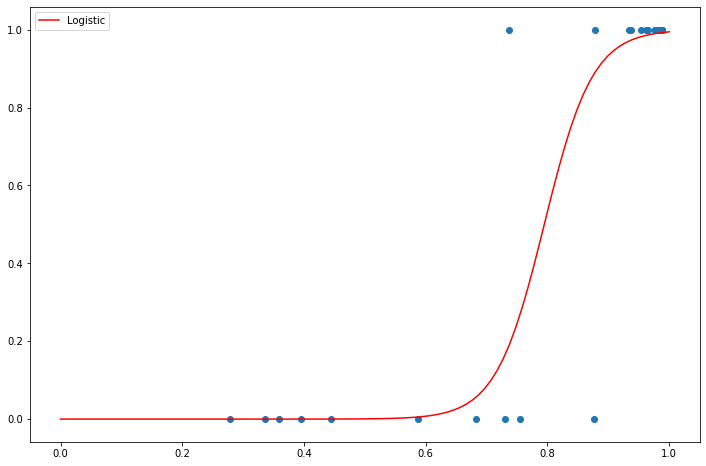

In [24]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(support, results_log.predict(smxnew), 'r-', label='Logistic')
ax.scatter(df['RF_prediction_mean'], df['OD_prediction'])
ax.legend();